*실습과제* 17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%cd /content/drive/MyDrive/Practice/Artificial_Intelligence

[Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/Artificial_Intelligence'
/content


setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
print("2019250059 한민욱")

No GPU was detected. CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.
2019250059 한민욱


In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

What is a Convolution?

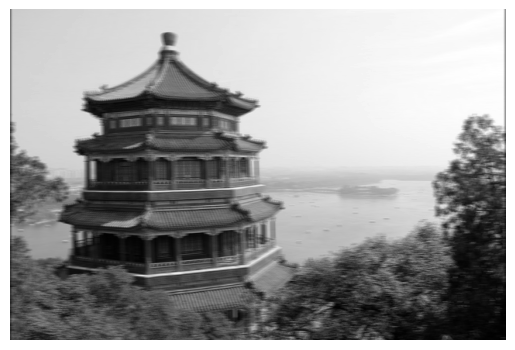

2019250059 한민욱


In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()
print("2019250059 한민욱")

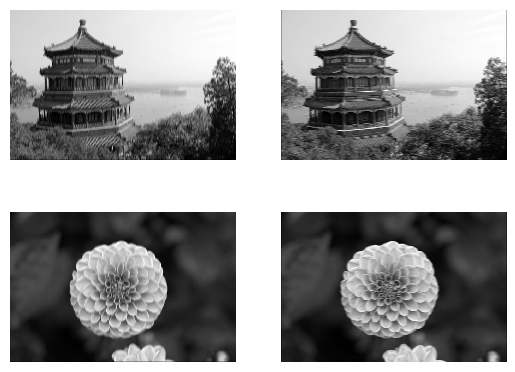

2019250059 한민욱


In [ ]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()
print("2019250059 한민욱")

In [ ]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


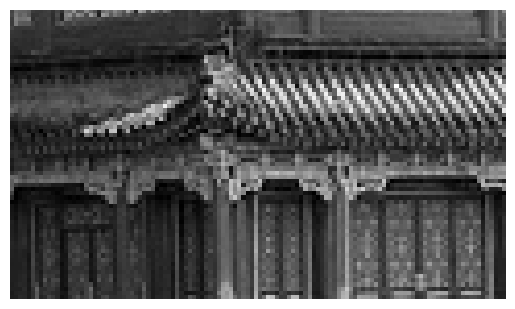

Saving figure china_vertical


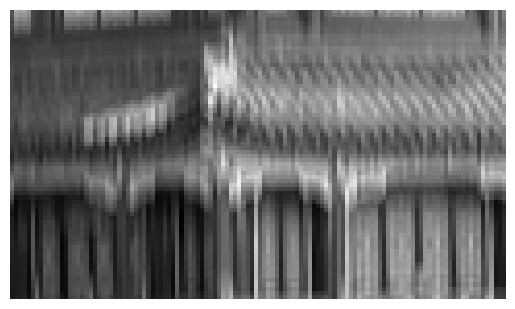

Saving figure china_horizontal


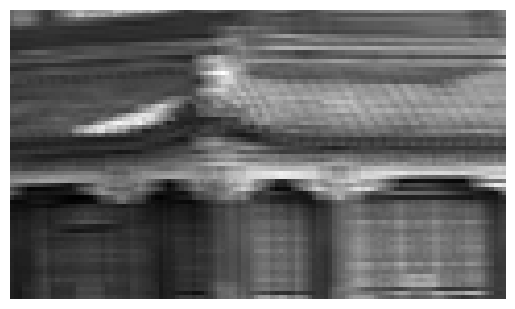

2019250059 한민욱


In [ ]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

print("2019250059 한민욱")

이 코드는 이미지를 잘라내어 특정 부분을 시각화하는 함수와 잘라낸 이미지를 저장하고 플롯하는 루프를 나타냅니다.

crop 함수는 이미지를 입력으로 받아서 지정된 범위 내의 부분 이미지를 반환합니다.
plot_image(crop(images[0, :, :, 0]))을 호출하여 첫 번째 이미지의 일부를 시각화합니다.
save_fig("china_original", tight_layout=False)을 호출하여 잘라낸 이미지를 "china_original"이라는 이름의 파일로 저장합니다.
for 루프를 사용하여 각 특성 맵에 대해 반복합니다.
각 반복에서 plot_image(crop(outputs[0, :, :, feature_map_index]))를 호출하여 첫 번째 이미지에 대한 각 특성 맵의 일부를 시각화합니다.
save_fig(filename, tight_layout=False)을 호출하여 각 특성 맵을 "china_vertical" 및 "china_horizontal"이라는 파일로 저장합니다.
이렇게 하면 원본 이미지와 각 특성 맵의 일부가 잘라내어 플롯되고 저장됩니다. 이러한 시각화는 특성 맵이 이미지의 어떤 부분에 의해 활성화되는지를 이해하는 데 도움이 됩니다.








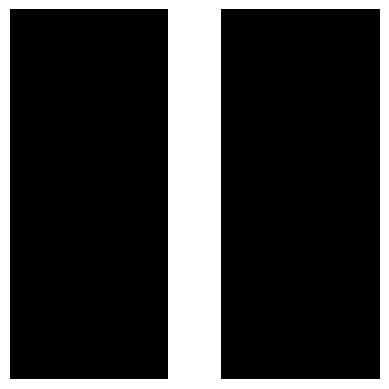

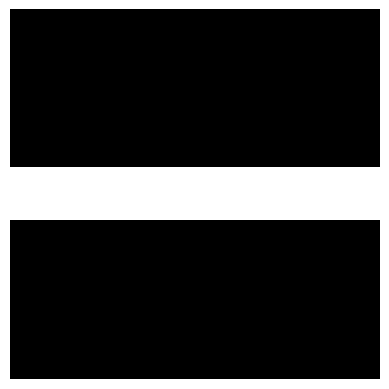

2019250059 한민욱


In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()
print("2019250059 한민욱")

Convolutional Layer

In [ ]:
conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu")

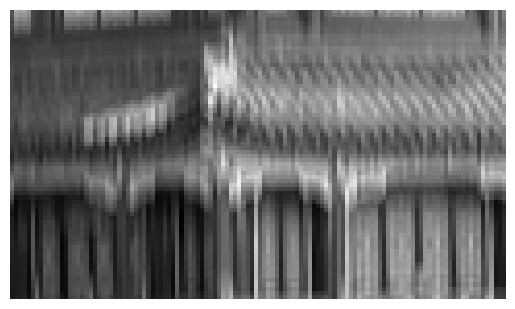

2019250059 한민욱


In [ ]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()
print("2019250059 한민욱")

위 코드는 주어진 이미지에 대해 합성곱 층을 적용한 후 결과를 시각화하는 예시입니다.

conv는 keras.layers.Conv2D를 사용하여 합성곱 층을 정의합니다. 이 층은 2개의 필터를 사용하고 커널 크기는 7x7이며, 스트라이드는 1로 설정되어 있습니다. 패딩은 "SAME"으로 설정되어 입력과 출력의 크기를 동일하게 유지합니다. 활성화 함수는 ReLU가 사용됩니다.
plot_image(crop(outputs[0, :, :, 0]))을 호출하여 첫 번째 이미지에 대한 첫 번째 특성 맵을 시각화합니다. 이를 위해 이미지를 잘라내고 적절한 부분만 플롯합니다.
plt.show()를 호출하여 첫 번째 특성 맵을 표시합니다.
이렇게 하면 주어진 이미지에 대해 적용된 첫 번째 특성 맵이 플롯되어 표시됩니다. 합성곱 층은 이미지에서 다양한 특징을 추출하는 데 사용되며, 이를 시각화하여 어떤 특징이 감지되었는지 확인할 수 있습니다.

VALID vs SAME padding

In [ ]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [ ]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [ ]:
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

In [ ]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))

# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

주어진 입력 크기, 커널 크기, 스트라이드, 그리고 패딩 방식에 따라 특성 맵의 크기를 계산하는 기능을 구현합니다. 또한 SAME 패딩을 적용할 때 필요한 패딩 양과 패딩된 입력의 크기를 계산하는 함수를 작성합니다. 이를 통해 Conv2D 층을 두 개 생성하고, 하나는 VALID 패딩을 사용하고 다른 하나는 SAME 패딩을 사용합니다. VALID 패딩을 사용한 경우 출력을 계산하고, SAME 패딩을 사용한 경우 해당 패딩을 수동으로 적용한 후 출력을 계산합니다. 마지막으로 두 결과를 비교하여 동등함을 확인합니다. 이를 통해 직접 구현한 SAME 패딩이 Conv2D 층의 SAME 패딩과 동일한 결과를 제공하는지 확인할 수 있습니다.

Pooling layer

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

Saving figure china_max_pooling


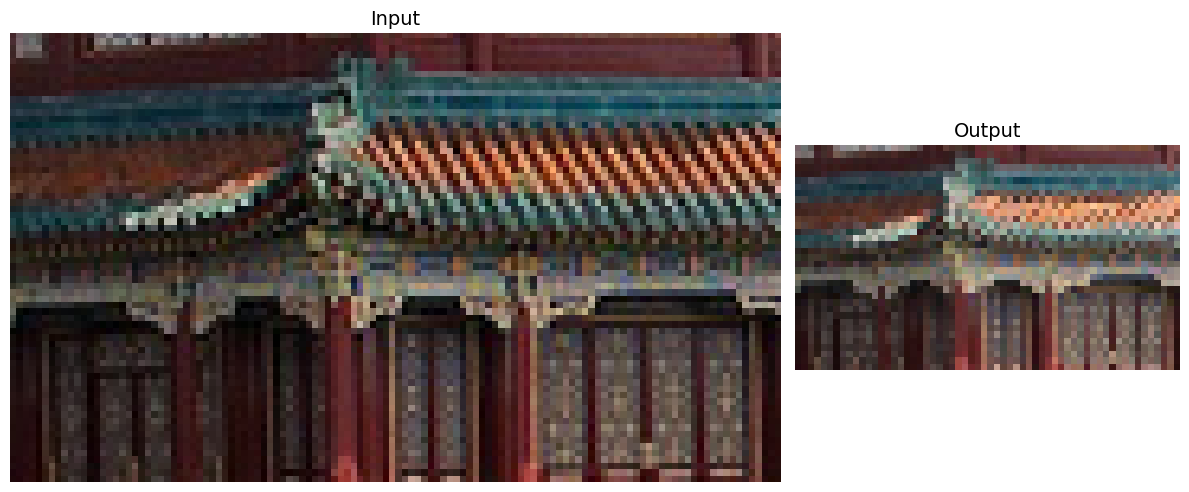

2019250059 한민욱


In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()
print("2019250059 한민욱")

이 코드는 이미지의 해상도를 줄이기 위해 최대 풀링(Max Pooling)을 사용하는 예제입니다.

MaxPool2D 층을 생성하고 풀링 크기를 2로 설정합니다.
이미지를 배열로 변환하여 잘라냅니다.
MaxPool2D를 사용하여 잘라낸 이미지에 대한 풀링을 계산합니다.
시각적으로 입력 이미지와 풀링된 이미지를 비교하기 위해 그림을 준비합니다.
왼쪽 subplot에 입력 이미지를, 오른쪽 subplot에 풀링된 이미지를 그립니다.
최종 그림을 표시합니다.
이를 통해 입력 이미지를 풀링하여 해상도를 줄인 결과를 시각화할 수 있습니다

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 832s 482ms/step - loss: 0.7172 - accuracy: 0.7528 - val_loss: 0.4039 - val_accuracy: 0.8588
Epoch 2/10
1719/1719 [==============================] - 840s 489ms/step - loss: 0.4315 - accuracy: 0.8563 - val_loss: 0.3400 - val_accuracy: 0.8804
Epoch 3/10
1719/1719 [==============================] - 838s 488ms/step - loss: 0.3685 - accuracy: 0.8763 - val_loss: 0.3162 - val_accuracy: 0.8858
Epoch 4/10
1719/1719 [==============================] - 826s 481ms/step - loss: 0.3415 - accuracy: 0.8854 - val_loss: 0.2912 - val_accuracy: 0.8922
Epoch 5/10
1719/1719 [==============================] - 829s 482ms/step - loss: 0.3110 - accuracy: 0.8930 - val_loss: 0.2785 - val_accuracy: 0.8980
Epoch 6/10
1719/1719 [==============================] - 819s 476ms/step - loss: 0.3011 - accuracy: 0.8977 - val_loss: 0.2837 - val_accuracy: 0.9024
Epoch 7/10
1719/1719 [==============================] - 815s 474ms/step - loss: 0.2875 - accuracy: 0.9036 - val_

In [ ]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 1s 0us/step


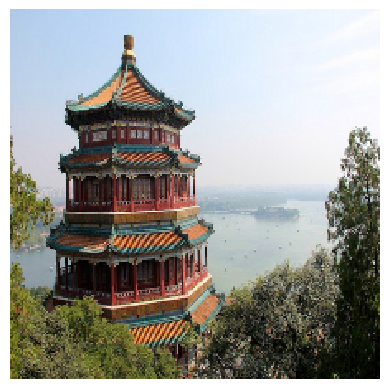

2019250059 한민욱


In [ ]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()
print("2019250059 한민욱")

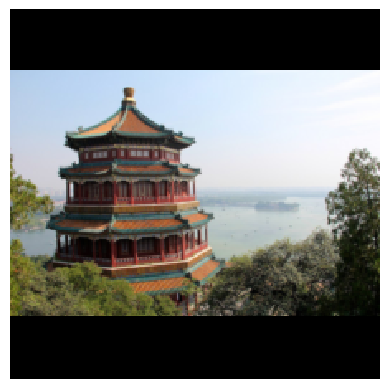

In [ ]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

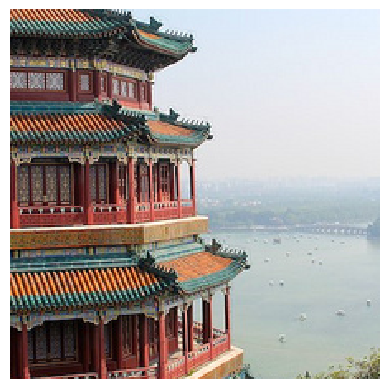

2019250059 한민욱


In [ ]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()
print("2019250059 한민욱")


tf.image.resize_with_pad() 및 tf.image.resize_with_crop_or_pad() 함수를 사용하여 이미지 크기를 조정하는 코드입니다. 두 가지 방법으로 이미지를 크기 조정하고 시각화하는 부분이 포함되어 있습니다. resize_with_pad() 함수는 이미지를 지정된 크기로 조정하고, 부족한 부분은 0으로 채워넣습니다. resize_with_crop_or_pad() 함수는 이미지를 지정된 크기로 조정하고, 부족한 부분은 0으로 채워넣거나 잘라냅니다.

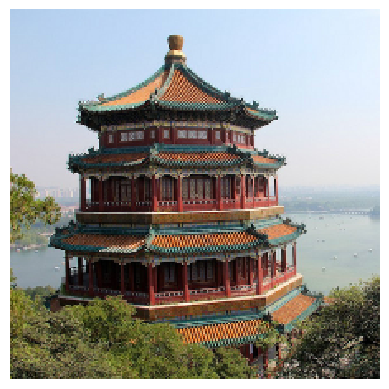

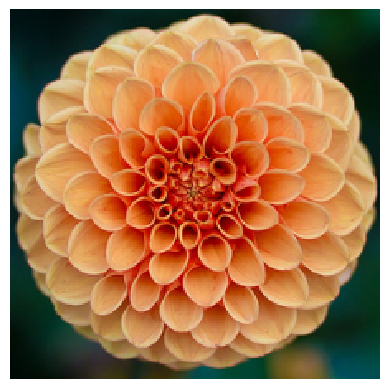

2019250059 한민욱


In [ ]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()
print("2019250059 한민욱")

첫 번째 이미지에서는 china_box에 지정된 상자를 자르고 크기를 조정한 결과를, 두 번째 이미지에서는 flower_box에 지정된 상자를 자르고 크기를 조정한 결과를 시각화합니다.

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [ ]:
Y_proba.shape

(2, 1000)

In [ ]:
top_K = keras.applications.resnet50.decode_predictions( Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

35363/35363 [==============================] - 0s 0us/step
Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.08%
  n03781244 - monastery    11.69%

Image #1
  n04522168 - vase         53.97%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.96%

